<img alt='UCL' src="images/ucl_logo.png" align='center'>


[<img src="images/noun_post_2109127.svg" width="50" align='right'>](040_GDAL_mosaicing_and_masking.ipynb)
[<img src="images/noun_pre_2109128.svg" width="50" align='right'>](031_Numpy.ipynb)



# 032 More `numpy`


## Purpose


We continue our exploration of `numpy` and move onto topics we need for efficient array processing.


### Prerequisites

* [020_Python_files](020_Python_files.ipynb)
* [021 URLs](021_URLs.ipynb)
* [022 Pandas](022_Pandas.ipynb)
* [023 Plotting](023_Plotting.ipynb)
* [031_Numpy](031_Numpy.ipynb)

You will need to know the material  from [031_Numpy](031_Numpy.ipynb) in detail.

### `np.loadtxt`

Let's access an interesting dataset on the frequency of satellite launches to illustrate this.

[![SpaceX landing](images/giphy.gif)](https://media.giphy.com/media/26DNbCqVfLJbYrXIA/giphy.gif)

The library code `geog0111.nsat` accesses a database at [https://www.n2yo.com](https://www.n2yo.com) and gets a table satellite launch data.

Data from this is stored in the datafile [data/satellites-1957-2021.gz](data/satellites-1957-2021.gz). This is a compressed text file.

We can use `np.loadtxt` to read files of this nature into numpy arrays in a similar way to how we [read into panadas](022_Pandas.ipynb#Reading-data-into-pandas). If the dataset is not `CSV` but simply a whitespaced text file, it is often easier to use `np.loadtxt` than `pandas`.

In the case of this dataset, we wish to interpret the launch counts as integers, so we convert the data we read to integers.

In [1]:
import numpy as np

filename = 'data/satellites-1957-2021.gz'
data=np.loadtxt(filename).astype(np.int)

# shape of data
print(data.shape)

(12, 64)


The dataset dimensions are to `(month,year)`. Indices into the array are zero-based, so we can relate month number (1 being January) and year number to index `(i,j)` through:

    i = month - 1
    j = year - 1957
    
We can print some summary statistics:

In [2]:
print(f'data shape {data.shape}')

print(f'some summary statistics over the period 1957 to 2021:')
print(f'The total number of launches is {data.sum()}')
print(f'The mean number of launches is {data.mean() : .2f} per month')

data shape (12, 64)
some summary statistics over the period 1957 to 2021:
The total number of launches is 45689
The mean number of launches is  59.49 per month


### slicing, `slice`

We have seen [above](031_Numpy.ipynb#Indexing-arrays) how we can provide a tuple of indices to access particular array elements. Often we want to access 'blocks' of an array. A set of indices would be inefficient for that. Instead, we use the idea of slices `(from:to:step)` that we have come across before for [strings](013_Python_string_methods.ipynb#slice) . Remember that `to` is "up to but not including" the to number.

If we specify `:` or `::` in the slice, it means we take the defaults for `(from:to:step)`. If we specify only one number, that is `from`. If we specify two, it is `from:to`.

So:

    data[0]
    
is the data for month index 0 (January), `data[1]` for February etc. Or:

    data[0:2]
   
is the data for month index 0 (January) **and** 1 (February)  etc. 

We can get more specific statistics then such as:

In [3]:
import numpy as np

filename = 'data/satellites-1957-2021.gz'
data=np.loadtxt(filename).astype(np.int)

print(data[0].shape)

print(f'mean launches in month 0: {data[0].mean() :.2f}')
print(f'max  launches in month 0: {data[0].max()}')

(64,)
mean launches in month 0: 33.95
max  launches in month 0: 237


We can refer to items in the second dimension of the array, by using a code for *all* values of the first dimension. So:

    data[:,0]
    
refers to all elements in dimension 0 (i.e. all months here) by only year 0 (1957).

In [4]:
print(data[:,0].shape)

print(f'mean launches in year 1957: {data[:,0].sum()}')
print(f'max  launches in year 1957: {data[:,0].max()}')

(12,)
mean launches in year 1957: 3
max  launches in year 1957: 2


#### Exercise 1

* Print out the total number of launches per month, for each month.
* Print out the total number of launches per year, for the years 2010 to 2020 inclusive

In [5]:
# ANSWER
import numpy as np

filename = 'data/satellites-1957-2021.gz'
data=np.loadtxt(filename).astype(np.int)

# Print out the total number of launches 
# per month, for each month.
# use sum() to sum over data[m] and loop over m
# get length of m from data.shape[0]
for m in range(data.shape[0]):
    print(f'{data[m].sum()} launches in month {m}')

2173 launches in month 0
3745 launches in month 1
2895 launches in month 2
3183 launches in month 3
6606 launches in month 4
5772 launches in month 5
3279 launches in month 6
2481 launches in month 7
4402 launches in month 8
4035 launches in month 9
3273 launches in month 10
3845 launches in month 11


In [6]:
# ANSWER
import numpy as np

filename = 'data/satellites-1957-2021.gz'
data=np.loadtxt(filename).astype(np.int)

# Print out the total number of launches 
# per year, for the years 2010 to 2020
# use sum() to sum over data[y] and loop over y
# translate year to index by subtracting 1957

# its best to be explicit about this
# this answer more clearly relates to the qn
years = np.arange(2010,2020+1) - 1957
for y in years:
    print(f'{data[:,y].sum()} launches in year {y+1957}')


373 launches in year 2010
315 launches in year 2011
435 launches in year 2012
352 launches in year 2013
355 launches in year 2014
335 launches in year 2015
308 launches in year 2016
512 launches in year 2017
741 launches in year 2018
735 launches in year 2019
922 launches in year 2020


The `numpy` formatting for slice in an array is `start:stop:step` as we have seen. Sometimes it is convenient to use the function `slice(start:stop:step)` to specify this.

Recall that the array `data` is two-dimensional of shape `(12, 64)` where the first axis is month and the second year after 1957. To describe the months of May to July inclusive (axis 0: index `4:7`) and years `1990-2000` inclusive (axis 1: index `1990-1957:2000-1957+1` = `33:44`) we can write:

In [7]:
subset = data[4:7,33:44]
print(f'shape of subset is {subset.shape}')

shape of subset is (3, 11)


Equivalently, using `slice`:

In [8]:
axis0 = slice(4,7)
axis1 = slice(33,44)

subset = data[axis0,axis1]
print(f'shape of subset is {subset.shape}')
print(f'slices: {axis0},{axis1}')

shape of subset is (3, 11)
slices: slice(4, 7, None),slice(33, 44, None)


One advantage of using `slice` is that we can store the axis slice information in a variable. We access the individual elements as:

In [9]:
axis0.start,axis0.stop,axis0.step

(4, 7, None)

#### Exercise 2

        import numpy as np
        filename = 'data/satellites-1957-2021.gz'
        data=np.loadtxt(filename).astype(np.int)

* Use `slice` to produce a sub-set of the launch dataset `data` for the months January, March, and May for the years 1960-1966 inclusive. This is 3 months and 7 years, so the resultant array should have shape `(3,7)`

In [10]:
# ANSWER
import numpy as np
filename = 'data/satellites-1957-2021.gz'
data=np.loadtxt(filename).astype(np.int)

msg = '''
 Use slice to produce a sub-set of the launch 
 dataset data for the months January, March, and May

 January, March, and May -> months 0,2,4 so slice(0:6:2)

 for the years 1960-1966 inclusive
 -> slice(1960-1957:1966-1957+1:1) -> slice(3,10)
'''
axis0 = slice(0,6,2)
axis1 = slice(3,10)
subset = data[axis0,axis1]
print(f'subset is of shape {subset.shape}')

subset is of shape (3, 7)


### axis

Whilst it is perfectly possibly to loop over one dimension of an array and calculate statistics over the other dimension, it is not very [Pythonic](https://docs.python-guide.org/writing/style/) to do it that way. 

Instead. we can specify the array axes over which we want the operation to occur.

For example, in our satellite launch dataset, the dimension 0 is month index and the dimension 1 is year index. To calculate the mean over all years then, we apply the `mean` function to axis 1:

In [11]:
import numpy as np

filename = 'data/satellites-1957-2021.gz'
data=np.loadtxt(filename).astype(np.int)

# mean over all years
data.mean(axis=1)

array([ 33.953125,  58.515625,  45.234375,  49.734375, 103.21875 ,
        90.1875  ,  51.234375,  38.765625,  68.78125 ,  63.046875,
        51.140625,  60.078125])

This is much more convenient than the loop we did above. The axis keyword is widely used in `numpy`, and you can apply most operations over one or more axis. 

#### Exercise 3

* Plot the total number of satellite launches per year, as a function of year

You will need to remember how to [plot line graphs](023_Plotting.ipynb#Plotting-Graphs)

Text(0.5, 0, 'year')

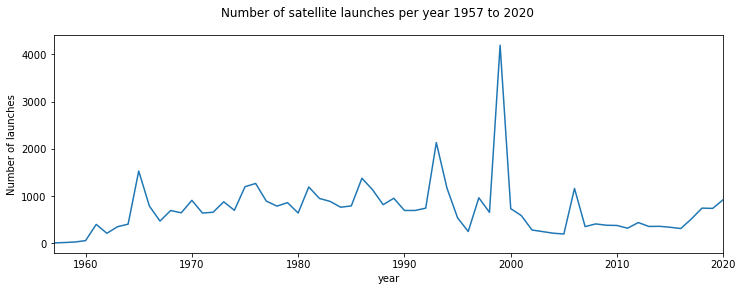

In [12]:
# ANSWER

import numpy as np
import matplotlib.pyplot as plt

filename = 'data/satellites-1957-2021.gz'
data=np.loadtxt(filename).astype(np.int)

# total for all years, so sum over all months (axis 0)
n = data.sum(axis=0)
# clean way to do years
years = np.arange(1957,1957+data.shape[1])

name = f'Number of satellite launches per year {years[0]} to {years[-1]}'

# plot size 
x_size,y_size = 12,4
fig, axs = plt.subplots(1,1,figsize=(x_size,y_size))
fig.suptitle(name)
# plot y-data and set the label
axs.plot(years,n)
# set x-limits to get a neat graph
axs.set_xlim(years[0],years[-1])

axs.set_ylabel(f'Number of launches')
# x-label
axs.set_xlabel(f'year')

In [13]:
# ANSWER
# Print out the total number of 
# launches per month, for each month.

# use sum for total
# we can use data.shape[0] for the size of the 1st dimension
for m in range(data.shape[0]):
    print(f'{data[m].sum()} launches in month index {m}')
    

2173 launches in month index 0
3745 launches in month index 1
2895 launches in month index 2
3183 launches in month index 3
6606 launches in month index 4
5772 launches in month index 5
3279 launches in month index 6
2481 launches in month index 7
4402 launches in month index 8
4035 launches in month index 9
3273 launches in month index 10
3845 launches in month index 11


In [14]:
# ANSWER
# Print out the total number of 
# launches per year, for the years 2010 to 2020 inclusive

# use sum for total
for y in range(2010,2020+1):
    # y is a year, but we need index
    j = y - 1957
    print(f'{data[:,j].sum()} launches in year {y}')

373 launches in year 2010
315 launches in year 2011
435 launches in year 2012
352 launches in year 2013
355 launches in year 2014
335 launches in year 2015
308 launches in year 2016
512 launches in year 2017
741 launches in year 2018
735 launches in year 2019
922 launches in year 2020


### `argmin`, `argmax` 

Whilst we have generated some initial summary statistics on the dataset, it's not really enough to give us a good idea of the data characteristics.

To do that, we want to be able to ask somewhat more complex questions of the data, such as:

* which *year* has the most/least launches? 
* which month do most launches happen in? 
* which month in which year had the most launches? 
* which years had more than 100 launches?

Whilst we could do some of these with loops and slicing, we expect a more convenient approach for `numpy`.

To be able to address these, we need some new concepts:

* methods `argmin()` and `argmax()` that provide the *index* where the min/max occurs
* masking out array elements that meet some condition

The first set of these, `argmin()` and `argmax()` are straightforward to visualise and use:

In [15]:
import numpy as np

# read data as before
filename = 'data/satellites-1957-2021.gz'
data=np.loadtxt(filename).astype(np.int)

# sum the data over all months (axis 0)
sum_per_year = data.sum(axis=0)
# Construct an array of years
year_array = 1957 + np.arange(data.shape[1])

# Find the location (year) with **most** launches
# Find the index of sum_per_year with highest number (argmmax)
imax = np.argmax(sum_per_year)

# Find the location (year) with **least** launches
# Find the index of sum_per_year with lowest number (argmmax)
imin = np.argmin(sum_per_year)
print(imin,imax)
print(f'the year with most   launches was',\
      f'{year_array[imax]} with {sum_per_year[imax]}')
print(f'the year with fewest launches was',\
      f'{year_array[imin]} with {sum_per_year[imin]}')

0 42
the year with most   launches was 1999 with 4195
the year with fewest launches was 1957 with 3


#### Exercise 4

* Write code to print the months with highest and lowest number of launches

In [16]:
import numpy as np
# ANSWER
# Write code to print the months with 
# highest and lowest number of launches

# read data as before
filename = 'data/satellites-1957-2021.gz'
data=np.loadtxt(filename).astype(np.int)

# sum the data over all years (axis 1)
sum_per_month = data.sum(axis=1)
# Construct an array of months
month_array = 1 + np.arange(data.shape[0])

# Find the location (month) with **most** launches
# Find the index of sum_per_month with highest number (argmmax)
imax = np.argmax(sum_per_month)

# Find the location (month) with **least** launches
# Find the index of sum_per_month with lowest number (argmmax)
imin = np.argmin(sum_per_month)

print(f'the month with most   launches was',\
      f'{month_array[imax]} with {sum_per_month[imax]}')
print(f'the month with fewest launches was',\
      f'{month_array[imin]} with {sum_per_month[imin]}')

the month with most   launches was 5 with 6606
the month with fewest launches was 1 with 2173


### masking

In section [011_Python_data_types](011_Python_data_types.ipynb#Data-types:-bool) we came across the boolean (binary) data type that can take the states `True` or `False`.

Boolean arrays in `numpy` are important in the efficient use of arrays, as they can act as a mask on an array. 

For example:

The form of filtering above (`high = sum_per_year >= 1000`) produces a numpy array of the same shape as that operated on (`sum_per_year` here) of `bool` data type.  It has entries of `True` where the condition is met, and `False` where it is not met.

In [17]:
import numpy as np

# read data as before
filename = 'data/satellites-1957-2021.gz'
data=np.loadtxt(filename).astype(np.int)
# sum over all months (axis 0)
sum_per_year = data.sum(axis=0)

high = sum_per_year >= 1000
print(high)

[False False False False False False False False  True False False False
 False False False False False False  True  True False False False False
  True False False False False  True  True False False False False False
  True  True False False False False  True False False False False False
 False  True False False False False False False False False False False
 False False False False]


We can think of this logical array as a 'data mask' that we use to select (filter) entries:

In [18]:
# form the data mask
high = (sum_per_year >= 1000)
# form an attau of years
years = 1957 + np.arange(data.shape[1])

# select only elements where mask is True
print(f'years with 1000 or more launches {years[high]}')

years with 1000 or more launches [1965 1975 1976 1981 1986 1987 1993 1994 1999 2006]


We can apply logical operators to boolean arrays:

In [19]:
low = np.logical_not(high)
print(low)

[ True  True  True  True  True  True  True  True False  True  True  True
  True  True  True  True  True  True False False  True  True  True  True
 False  True  True  True  True False False  True  True  True  True  True
 False False  True  True  True  True False  True  True  True  True  True
  True False  True  True  True  True  True  True  True  True  True  True
  True  True  True  True]


including combinations of logical arrays. 

Suppose we want to know the years after the year 2000 that have 1000 or greater launches. We can form two boolean arrays:
    
    years > 2000
    sum_per_year >= 1000
    
Since these arrays are of the same shape, we can combine them element-wise:

In [20]:
c1 = (years > 2000)
c2 = (sum_per_year >= 1000)
combined = np.logical_and(c1,c2)
print(years[combined])

[2006]


### `where`

Sometimes, instead of just applying the filter as above, we want to know the indices of the filtered values.

To do this, we can use the `np.where()` method. This takes a `bool` array as its argument (such as our data masks or other conditions) and returns a tuple of the indices where this is set `True`. 

As an example, lets find month, year pairs where the number of launches is greater than 500. 

For a final flourish, we load the dataset into `pandas` to print it in a table:

In [21]:
# find month, year where launches > 500
import numpy as np
import pandas as pd

# read data as before
filename = 'data/satellites-1957-2021.gz'
data=np.loadtxt(filename).astype(np.int)

month_index,year_index = np.where(data > 500)
# This gives array indices

# convert index to real month and year
# and *transpose* (swap rows and columns)
# using .T
high_launches = np.array([month_index+1,year_index+1957]).T

# load into pandas data frame 
df = pd.DataFrame(high_launches,columns=['month','year'])
df

,month,year
0,2,1986
1,5,1994
2,5,1999
3,6,1981
4,6,1993
5,6,2006
6,7,1976
7,9,1997


### Simplifying shape: `flatten`, `ravel`, `reshape` and `unravel_index`

We have seen that we can build multi-dimensional arrays in `numpy`. Sometimes, for processing though, we need to modify the number of dimensions of an array. There are several ways to do this.

First, if we want simply to collapse a multi-dimensional array into a 1D array, we can use `ravel` or `flatten`. A useful case to consider for this is when we process on a grid.

We generate a grid of `locations` similar to [previously](031_Numpy.ipynb#np.linspace,-np.arange,-np.mgrid):

In [22]:
import numpy as np

p0min,p0max,p0step = -1.0,1.0,0.1
p1min,p1max,p1step = -1.0,1.0,0.1

p0,p1 = np.mgrid[p0min:p0max+p0step:p0step,\
                         p1min:p1max+p1step:p1step]

print(f'shape of p0 : {p0.shape}')
print(f'shape of p1 : {p1.shape}')

shape of p0 : (21, 21)
shape of p1 : (21, 21)


Now, we want to calculate a function of the variables `p0` and `p1` and want to find the parameter values at which the function has a local (over the grid) minimum. We will use the function:

       y = 1 + 2 * (p0 - 0.5)**2 + 3 * (p1 - 0.4)**2
 
as an example, or the range `[-1,1]` for both parameters. It should be clear that the minimum of this function lies at `(0.5,0.4)`, but we want to show this numerically.

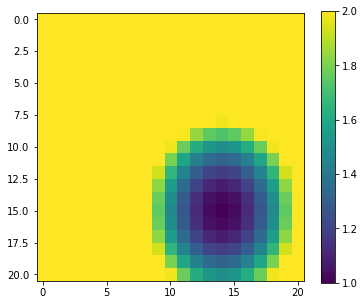

In [23]:
import matplotlib.pyplot as plt

# our function
y = 1 + 2 * (p0 - 0.5)**2 + 3 * (p1 - 0.4)**2 

# plot it
fig, axs = plt.subplots(1,1,figsize=(6,5))
im = axs.imshow(y,interpolation='nearest',vmax=2)
fig.colorbar(im, ax=axs)

In [24]:
np.argmin(y)

329

We could  use `np.where` to find the index of the minimum point by seeking where it equals the minimum value. That is not always a good idea, as there might be rounding errors involved.

A more robust approach is to use `np.argmin` to find the index at which the argument has its minimum.

In [25]:
imin = np.argmin(y)
print(f'index of minimum point: {imin}')

index of minimum point: 329


The index of `329` is returned which might at first seem odd: the array `y` is two dimensional of shape `(21,21)` so how can we have a 1D index of `329`?

The answer is that `np.argmin` operates on a 'flattened' version of the array. When we used it [above](032_More_numpy.ipynb#argmin,-argmax) this issue was not apparent because the input array was 1D.

If we want to apply the flattened array index, we must first then flatten the array. There are two functions for this: `flatten` and `ravel`. They both have a similar effect, but `flatten` operates of a *copy* of the array. This means it uses more memory. But also any changes we make are not reflected in the original array. Very often we use `ravel` instead then. This takes no more memory, but any changes we make to the ravelled array will also happen to the original array. You should think carefully about which you use in any particular circumstance, but unless you really need to operate on a copy, you might generally use `ravel`.

In [26]:
yrav = y.ravel()
print(f'shape of y    : {y.shape}')
print(f'shape of yrav : {yrav.shape}')

p0min,p1min = p0.ravel()[imin],p1.ravel()[imin]
print(f'parameter at minimum : {p0min : .3f},{p1min : .3f}')

shape of y    : (21, 21)
shape of yrav : (441,)
parameter at minimum :  0.500, 0.400


which matches what we expected. 

These two functions are an integral part of efficient use of `numpy` for large-dimensional problems. We can recognise in the example above that it makes no difference to the processing whether we search for the `argmin` over a 1D or 2D array. It makes sense then to treat it as a 1D problem.

The same sort of issues arise when we are dealing with image processing: although an image is defined over a 2D spatial extent, if the algorithm we are applying is operated independently per pixel, then this can be equally treated as a 1D problem. If we had a problem to solve over an image space and over a parameter space (as we come across see later) then we can simplify our data structure by collapsing unnecessary multi-dimensional arrays into 1D arrays. In that case, it might not always be possible to use `ravel` as we might need to 'flatten' different parts of the dataset in different fashions. For this, more refined control on array shape, we use `reshape`.

To illustrate this, we generate a function y over the parameter space `p0`, `p1` that we suppose described our function at different time steps:

In [27]:
y0 = 1 + 2 * (p0 - 0.5)**2 + 3 * (p1 - 0.4)**2 
y1 = 1 + 4 * (p0 - 0.2)**2 + 3 * (p1 - 0.1)**2 
y2 = 1 + 8 * (p0 - 0.7)**2 + 6 * (p1 - 0.3)**2 

y = np.array([y0,y1,y2])
print(f'shape of y : {y.shape}')

shape of y : (3, 21, 21)


`y` is a 3D array with the first axis representing time, and the second and third the parameter space. We can see that the minima should occur at `[0.5 0.2 0.7],[0.4 0.1 0.3]`

We wish to find parameters that give the minimum of the function *for each time step* (i.e. solve numerically for `[0.5 0.2 0.7],[0.4 0.1 0.3]`). The result we expect then is that each parameter should be an array of shape `(3,)`.

We can use `np.argmin` again for this problem, as we can specify the axis over which to operate for `argmin`. However, it can only operate over a single axis, so we must first re-form the array to one of shape `(3,21 * 21)`. The shape of the first dimension will be simply `y.shape[:1]`. We can multiply the last two elements of the shape array together using `np.prod` as `np.prod(np.array(y.shape[1:]))`, then use the new shape with `np.reshape`:

In [28]:
# get the new shape we want
firstpart  = y.shape[:1]
print(firstpart)

secondpart = np.prod(np.array(y.shape[1:]))
print(secondpart)

# use * to unload the tuple
newshape = (*y.shape[:1],np.prod(np.array(y.shape[1:])))
print(newshape)

(3,)
441
(3, 441)


In [29]:
# reshape 
y_ = y.reshape(newshape)

print(f'shape of y  : {y.shape}')
print(f'shape of y_ : {y_.shape}')

shape of y  : (3, 21, 21)
shape of y_ : (3, 441)


In [30]:
# argmin over axis 1 (the parameters)
imin = np.argmin(y_,axis=1)
print(f'1D index of minimum point: {imin}')

1D index of minimum point: [329 263 370]


We may want to know the 2D index in the parameter grid for some applications. This can be conveniently calculated with `np.unravel_index`:

In [31]:
ip0min,ip1min = np.unravel_index(imin,p0.shape)

print(f'2D index of minimum point: {ip0min}, {ip1min}')
p0min = p0[ip0min,ip1min]
p1min = p1[ip0min,ip1min]
print(f'parameter at minimum : {p0min},{p1min}')

2D index of minimum point: [15 12 17], [14 11 13]
parameter at minimum : [0.5 0.2 0.7],[0.4 0.1 0.3]


which corresponds with what we expected.

That's great: by appropriate use of `reshape` we have found the flattened-parameter index for each of the time samples where the function is minimum.

We could then print the parameters at the minimum as above, using the index array `imin` as indices into the flattened parameter arrays:

In [32]:
p0min,p1min = p0.ravel()[imin],p1.ravel()[imin]
print(f'parameter at minimum : {p0min},{p1min}')

parameter at minimum : [0.5 0.2 0.7],[0.4 0.1 0.3]


## Reconciling arrays: `np.newaxis`

`numpy` is very efficient at array-based processing. This means that for your codes to be efficient, you should avoid any explicit loops when dealing with large datasets. We will come across examples later where this is critical to being able to process data in a reasonable time.

Let's consider the case where we have some function that calculates the linear function:

    y = c + m*x
    
where `x` is some `numpy` array of values of `x` and the linear model parameters are `c` (intercept) and `m` (slope). This is efficient in `numpy` and straightforward to do if `c` and `m` are scalar values (i.e. just a float number):

x-shape: (21,)
y-shape: (21,)


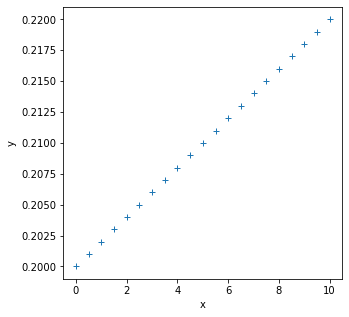

In [33]:
import matplotlib.pyplot as plt
import numpy as np

def linear_func(c,m,x):
    return m * x + c

# example parameters
c = 0.2
m = 0.002

# the x values
x = np.arange(0,10.5,0.5)

y = m* x + c

fig, axs = plt.subplots(1,1,figsize=(5,5))
axs.plot(x,y,'+')
axs.set_xlabel('x')
axs.set_ylabel('y')

print(f'x-shape: {x.shape}')
print(f'y-shape: {y.shape}')

Now let's try to calculate the model `y = c + m * x` for these same values of `x`, but for multiple sets of `c` and `m`. We will use [`np.mgrid`](031_Numpy.ipynb#np.linspace,-np.arange,-np.mgrid) as above to generate a grid of pairs of `c` and `m`:

grid_c is [[0.  0.  0.  0.  0.  0. ]
 [0.5 0.5 0.5 0.5 0.5 0.5]
 [1.  1.  1.  1.  1.  1. ]]
grid_m is [[0.   0.01 0.02 0.03 0.04 0.05]
 [0.   0.01 0.02 0.03 0.04 0.05]
 [0.   0.01 0.02 0.03 0.04 0.05]]
2d parameter grid: (3, 6)


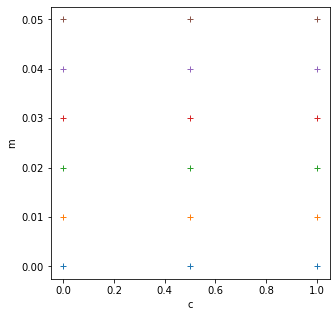

In [34]:
import matplotlib.pyplot as plt
# define the min and max and step for the grid we want
c_min,c_max,c_step = 0.0,1.,0.5
m_min,m_max,m_step = 0.0,0.05,0.01

grid_c,grid_m = np.mgrid[c_min:c_max+c_step:c_step,\
                         m_min:m_max+m_step:m_step]

print(f'grid_c is {grid_c}')
print(f'grid_m is {grid_m}')

# plot it
fig, axs = plt.subplots(1,1,figsize=(5,5))
axs.plot(grid_c,grid_m,'+')
axs.set_xlabel('c')
axs.set_ylabel('m')

print(f'2d parameter grid: {grid_c.shape}')

This grid is `(3,6)` and the `x` dataset is shape `(21,)`. 

We would expect the output dataset `y` that describes `c + m*x` for all `x`, for each value of `c` and `m` to have a shape `(3,6,21)`. Here, axis 0 and 1 refer to the parameter grid dimensions and axis 2 to the variation over `x`. The operation is a simple element-wise manipulation that `numpy` should be efficient at, even for large arrays. We will see that the key to doing this cleanly is to use [`np.newaxis`](https://numpy.org/doc/stable/reference/arrays.indexing.html).

An **inefficient** way of calculating `y` for each of the grid parameters would be to use a loop over each value of `x`:

In [35]:
print(f'for a single value of x, we get an output of shape {linear_func(grid_c,grid_m,0.1).shape}')

for a single value of x, we get an output of shape (3, 6)


In [36]:
# generate an output array to pack into
newshape = grid_c.shape + x.shape
y = np.zeros(newshape)
print(f'y shape: {y.shape}')

# inifficient: looping over each element of x -> xi
# and inserting into grid
for i,xi in enumerate(x):
    y[:,:,i] = linear_func(grid_c,grid_m,xi)


y shape: (3, 6, 21)


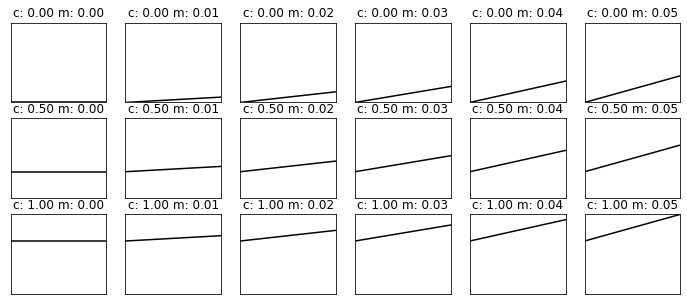

In [37]:
import matplotlib.pyplot as plt
ymin,ymax = y.min(),y.max()
xmin,xmax = x.min(),x.max()

# plots:     
fig, axs = plt.subplots(*(grid_c.shape),figsize=(12,5))
plt.setp(axs, xticks=[], yticks=[])

for i in range(y.shape[0]):
    for j in range(y.shape[1]):
        axs[i,j].plot(x,y[i,j],'k')
        axs[i,j].set_title(f'c: {grid_c[i,j]:.2f} m: {grid_m[i,j]:.2f}')
        axs[i,j].set_xlim(xmin,xmax)
        axs[i,j].set_ylim(ymin,ymax)

So, we know the sort of result we are looking for from this, ideally we would do it in a single call to the function with `numpy`.

In all of the simple cases above, we have performed operations of arrays of the same shape, so adding an array of shape `(10,2)` to another of the same shape results in an array of shape `(10,2)`. 

If we have an array of shape `(10,2,1)` and add it to an array of shape `(1,1,5)`, we will get a result of shape (10,2,5):

In [38]:
import numpy as np
# generate some random numbers

a = np.random.random((10,2,1))
b = np.random.random((1,1,5))

c = a + b
print(c.shape)

(10, 2, 5)


The 'rule' for combining arrays in this way can be thought of as:

* the arrays to be combined must have the same *number of dimensions* (3 here)
* the number of samples in any dimension must be *the same* or `1`

If we had started out with arrays of different shapes that we want to combine, e.g.:

In [39]:
import numpy as np
# generate some random numbers

a = np.random.random((10,2))
b = np.random.random((5))


Then we need to add new axes to the arrays to reconcile their dimensions. One clear way to do this is to use `np.newaxis` to add the new dimensions:

In [40]:
a = np.random.random((10,2))
b = np.random.random((5,))
print(f'a shape: {a.shape}')
print(f'b shape: {b.shape}')

a1 = a[:,:,np.newaxis]
b1 = b[np.newaxis,np.newaxis,:]
print(f'a1 shape: {a1.shape}')
print(f'b1 shape: {b1.shape}')

c1 = a1 + b1 
print(f'c1 shape: {c1.shape}')

a shape: (10, 2)
b shape: (5,)
a1 shape: (10, 2, 1)
b1 shape: (1, 1, 5)
c1 shape: (10, 2, 5)


Now, we can do element-wise operations of `a` and `b` as required, where the result will be of shape `(10,2,5)` and involve all element-wise combinations of `a` and `b`. 

#### Exercise 5

    def linear_func(c,m,x):
        return m * x + c
        
    x = np.arange(0,10.5,0.5)

    c_min,c_max,c_step = 0.0,1.,0.5
    m_min,m_max,m_step = 0.0,0.05,0.01

    grid_c,grid_m = np.mgrid[c_min:c_max+c_step:c_step,\
                             m_min:m_max+m_step:m_step]


* Use `np.newaxis` to reconcile the shapes of `grid_c`,`grid_m` and `x` 
* Make a single call to the function `linear_func`  using these reconciled variables
* Show how the shape of the output relates to the shape of the inputs 
* Confirm your result by plotting the results for each (c,m) value pair

In [41]:
# ANSWER
import numpy as np

def linear_func(c,m,x):
    return m * x + c

x = np.arange(0,10.5,0.5)

c_min,c_max,c_step = 0.0,1.,0.5
m_min,m_max,m_step = 0.0,0.05,0.01

grid_c,grid_m = np.mgrid[c_min:c_max+c_step:c_step,\
                         m_min:m_max+m_step:m_step]

# Use np.newaxis to reconcile the shapes of grid_c,grid_m and x
msg = '''
we are looking for output of shape 

    grid_c.shape + x.shape
    
so we add new axes to the final axis of grid_c,grid_m
and 2 new axes to the front of x
'''
print(msg)

grid_c1 = grid_c[:,:,np.newaxis]
grid_m1 = grid_m[:,:,np.newaxis]
x1      = x[np.newaxis,np.newaxis,:]
print(f'grid_c1 shape: {grid_c1.shape}')
print(f'grid_m1 shape: {grid_m1.shape}')
print(f'x1 shape:      {x1.shape}')

# Make a single call to the function linear_func 
# using these reconciled variables
y = linear_func(grid_c1,grid_m1,x1)

print(f'y shape:       {y.shape}')
msg = '''
Show how the shape of the output relates to the shape of the inputs 

The array y is of diemnsion (7, 6, 21)
values of c,m are on a grid (7, 6)
and x is (21,) so the result here involves
efficient element-wise multiplication
and addition for each combination of (c,m)
and each value of x
'''
print(msg)


we are looking for output of shape 

    grid_c.shape + x.shape
    
so we add new axes to the final axis of grid_c,grid_m
and 2 new axes to the front of x

grid_c1 shape: (3, 6, 1)
grid_m1 shape: (3, 6, 1)
x1 shape:      (1, 1, 21)
y shape:       (3, 6, 21)

Show how the shape of the output relates to the shape of the inputs 

The array y is of diemnsion (7, 6, 21)
values of c,m are on a grid (7, 6)
and x is (21,) so the result here involves
efficient element-wise multiplication
and addition for each combination of (c,m)
and each value of x



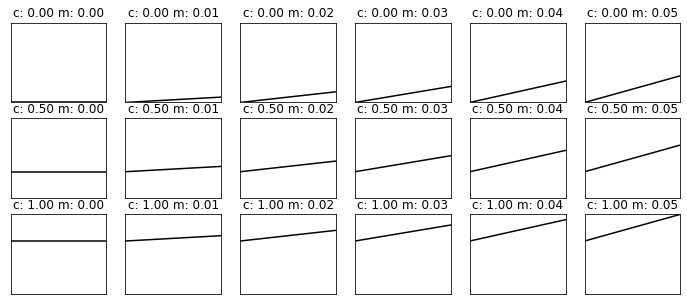

In [42]:
# Confirm your result by plotting the results for each (c,m) value pair
import matplotlib.pyplot as plt
ymin,ymax = y.min(),y.max()
xmin,xmax = x.min(),x.max()

# plots:     
fig, axs = plt.subplots(*(grid_c.shape),figsize=(12,5))
plt.setp(axs, xticks=[], yticks=[])

for i in range(y.shape[0]):
    for j in range(y.shape[1]):
        axs[i,j].plot(x,y[i,j],'k')
        axs[i,j].set_title(f'c: {grid_c[i,j]:.2f} m: {grid_m[i,j]:.2f}')
        axs[i,j].set_xlim(xmin,xmax)
        axs[i,j].set_ylim(ymin,ymax)

## Formative assessment

To get some feedback on how you are doing, you should complete and submit the formative assessment [064 Numpy](064_Numpy.ipynb).

### Summary

In this section, we have expanded our understanding of `numpy` processing to include topics such as finding the array index where some pattern occurs (e.g. `argmin()`, `argsort()` or `where()`) and how to generate and use masks for selecting data. We should now have a good grasp of the role of axes, slicing, and reconciling multi-dimensional grids for efficient processing.

Remember:


| Function | description   | keywords | 
 |---|---|---|
 | `np.loadtxt(f)` | Load datra from file `f` into numpy array ||
 | x[start:stop:step] | 1-D slice of array `x` ||
 | `slice(start:stop:step)` | function to apply to slice e.g. `x[slice(start:stop:step)]`|
 | `np.argmin(x)` | return 1D index of minimum value in array (/axis) |  `axis=N` : value taken over axis `N` |
 | `np.argmax(x)` | return 1D index of maximum value in array (/axis) |  `axis=N` : value taken over axis `N` |
 | `x > 1` | logical operator resulting in boolean array e.g. to use for masks |
 | `np.logical_not(x)` | element-wise not over array |
 | `np.logical_or(x,y)` | element-wise `a` or `b`  over array |
 | `np.logical_and(x,y)` | element-wise `a` and `b`  over array |
 | `np.where(x)` |  list of indices where `x` is `True` |
 | `x.flatten()` | convert copy of ND array `x` into 1D array |
  | `x.ravel()` | convert ND array `x` into 1D array |
| `x.reshape(shape)` | apply shape `shape` to array `x` |
| `np.unravel_index(indices,shape)` | unravel 1D indices `indices` to ND defined by `shape` |
| `np.newaxis` | add a new axis to array for reconciling multiple dimensions making a copy. Effectively makes new dimension of size `(1,)` |



[<img src="images/noun_post_2109127.svg" width="50" align='right'>](040_GDAL_mosaicing_and_masking.ipynb)
[<img src="images/noun_pre_2109128.svg" width="50" align='right'>](031_Numpy.ipynb)
